## Initialization

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import norm
np.random.seed(1234)

## 1) EXERCISE 

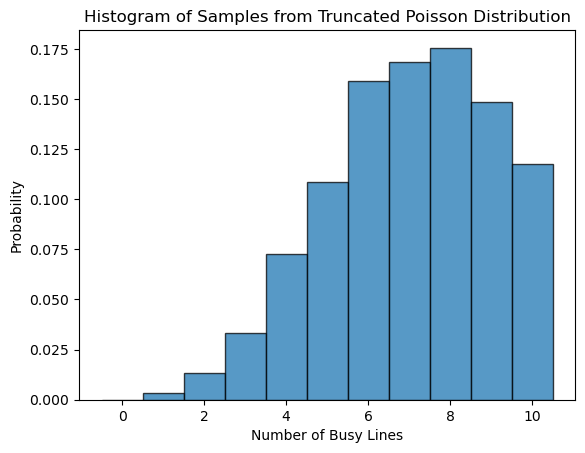

Chi-squared Statistic: 14.90914659261442, Critical value: 19.67513757268249, p-value: 0.1354094841650023


In [184]:
#initialize 
A = 8  
m = 10  
num_samples = 10000 


def truncated_poisson_dist(i, A, m):
    if i < 0 or i > m:
        return 0
    return (A**i) / np.math.factorial(i)

# Normalize the distribution
normalization_constant = sum(truncated_poisson_dist(i, A, m) for i in range(m+1))
def normalized_truncated_poisson_pmf(i, A, m):
    return truncated_poisson_dist(i, A, m) / normalization_constant

# Metropolis-Hastings sampling
def metropolis_hastings(A, m, num_samples):
    samples = []
    current_sample = np.random.randint(0, m+1)
    
    for _ in range(num_samples):
        proposal = np.random.randint(0, m+1)
        
        current_prob = normalized_truncated_poisson_pmf(current_sample, A, m)
        proposal_prob = normalized_truncated_poisson_pmf(proposal, A, m)
        
        acceptance_ratio = proposal_prob / current_prob
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal
        
        samples.append(current_sample)
    
    return samples

# Generate samples
samples = metropolis_hastings(A, m, num_samples)

# Plot histogram of samples
plt.hist(samples, bins=np.arange(m+2) - 0.5, density=True, alpha=0.75, edgecolor='black')
plt.xlabel('Number of Busy Lines')
plt.ylabel('Probability')
plt.title('Histogram of Samples from Truncated Poisson Distribution')
plt.show()

# Perform chi-square test
observed_freq, _ = np.histogram(samples, bins=np.arange(m+2) - 0.5)
expected_freq = [normalized_truncated_poisson_pmf(i, A, m) * num_samples for i in range(m+1)]

chi2_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)
alpha = 0.05
df = m + 1 # the size of m + the parameter A which gives 10+1 = 11
CV = stats.chi2.ppf(1 - alpha, df)
print(f"Chi-squared Statistic: {chi2_stat}, Critical value: {CV}, p-value: {p_value}")

## (2a)

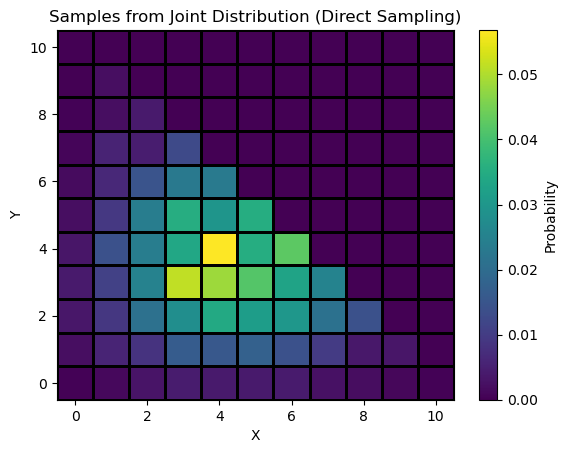

Chi-squared Statistic: 1093.7913871872831, Critical value: 21.02606981748307, p-value: 1.2303311710116278e-186


In [185]:
# Parameters
A1 = 4
A2 = 4
m = 10
df = m + 2
num_samples = 10000

# Joint distribution (unnormalized)
def joint_pmf(i, j, A1, A2, m):
    if i + j > m or i < 0 or j < 0:
        return 0
    return (A1**i / np.math.factorial(i)) * (A2**j / np.math.factorial(j))

# Normalize the distribution
normalization_constant = sum(joint_pmf(i, j, A1, A2, m) for i in range(m+1) for j in range(m+1-i))
def normalized_joint_pmf(i, j, A1, A2, m):
    return joint_pmf(i, j, A1, A2, m) / normalization_constant

# Metropolis-Hastings sampling
def metropolis_hastings_direct(A1, A2, m, num_samples):
    samples = []
    current_sample = (np.random.randint(0, m+1), np.random.randint(0, m+1))
    while sum(current_sample) > m:
        current_sample = (np.random.randint(0, m+1), np.random.randint(0, m+1))
    
    for _ in range(num_samples):
        i, j = current_sample
        proposal_i = np.random.randint(0, m+1)
        proposal_j = np.random.randint(0, m+1 - proposal_i)
        
        current_prob = normalized_joint_pmf(i, j, A1, A2, m)
        proposal_prob = normalized_joint_pmf(proposal_i, proposal_j, A1, A2, m)
        
        acceptance_ratio = proposal_prob / current_prob
        if np.random.rand() < acceptance_ratio:
            current_sample = (proposal_i, proposal_j)
        
        samples.append(current_sample)
    
    return samples

# Generate samples
samples_direct = metropolis_hastings_direct(A1, A2, m, num_samples)

# Plot histogram of samples
plt.hist2d(*zip(*samples_direct), bins=[np.arange(m+2)-0.5, np.arange(m+2)-0.5], density=True, edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Joint Distribution (Direct Sampling)')
plt.colorbar(label='Probability')
plt.show()

# Perform chi-square test
observed_freq, _, _ = np.histogram2d(*zip(*samples_direct), bins=[np.arange(m+2)-0.5, np.arange(m+2)-0.5])

# Compute expected frequencies
expected_freq = np.zeros((m+1, m+1))
for i in range(m+1):
    for j in range(m+1-i):
        expected_freq[i, j] = normalized_joint_pmf(i, j, A1, A2, m) * num_samples

# Flatten arrays and remove zero elements in expected_freq for chi-square test
observed_freq_flat = observed_freq.flatten()
expected_freq_flat = expected_freq.flatten()
observed_freq_nonzero = observed_freq_flat[expected_freq_flat > 0]
expected_freq_nonzero = expected_freq_flat[expected_freq_flat > 0]

# Ensure the sums are consistent
observed_sum = observed_freq_nonzero.sum()
expected_sum = expected_freq_nonzero.sum()
scaling_factor = observed_sum / expected_sum
expected_freq_nonzero *= scaling_factor

chi2_stat, p_value = chisquare(observed_freq_nonzero, f_exp=expected_freq_nonzero)
CV = stats.chi2.ppf(1 - alpha, df)
print(f"Chi-squared Statistic: {chi2_stat}, Critical value: {CV}, p-value: {p_value}")

## (2b)

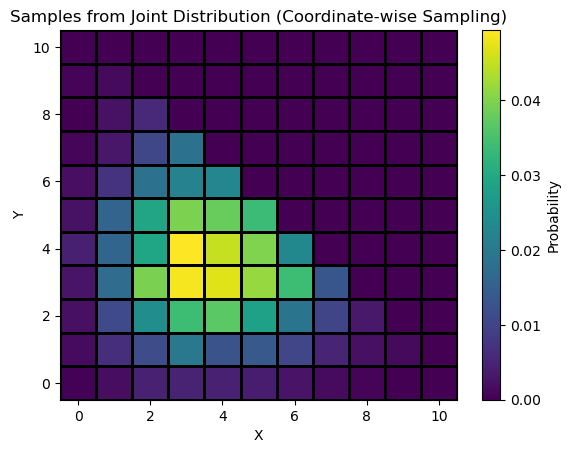

Chi-squared Statistic: 181.23151230110872, Critical value: 21.02606981748307 , p-value: 6.514506827339125e-13


In [186]:
# Parameters
A1 = 4
A2 = 4
m = 10
num_samples = 10000

# Joint distribution (unnormalized)
def joint_pmf(i, j, A1, A2, m):
    if i + j > m or i < 0 or j < 0:
        return 0
    return (A1**i / np.math.factorial(i)) * (A2**j / np.math.factorial(j))

# Normalize the distribution
normalization_constant = sum(joint_pmf(i, j, A1, A2, m) for i in range(m+1) for j in range(m+1-i))
def normalized_joint_pmf(i, j, A1, A2, m):
    return joint_pmf(i, j, A1, A2, m) / normalization_constant

# Metropolis-Hastings sampling (coordinate-wise)
def metropolis_hastings_coordinatewise(A1, A2, m, num_samples):
    samples = []
    current_sample = (np.random.randint(0, m+1), np.random.randint(0, m+1))
    while sum(current_sample) > m:
        current_sample = (np.random.randint(0, m+1), np.random.randint(0, m+1))

    for _ in range(num_samples):
        i, j = current_sample
        
        # Randomly decide to update i or j
        if np.random.rand() < 0.5:
            proposal_i = np.random.randint(0, m+1 - j)
            proposal_j = j
        else:
            proposal_i = i
            proposal_j = np.random.randint(0, m+1 - i)

        current_prob = normalized_joint_pmf(i, j, A1, A2, m)
        proposal_prob = normalized_joint_pmf(proposal_i, proposal_j, A1, A2, m)
        
        # Ensure no division by zero
        if current_prob == 0:
            acceptance_ratio = 1 if proposal_prob > 0 else 0
        else:
            acceptance_ratio = proposal_prob / current_prob
        
        if np.random.rand() < acceptance_ratio:
            current_sample = (proposal_i, proposal_j)
        
        samples.append(current_sample)
    
    return samples

# Generate samples
samples_coordinatewise = metropolis_hastings_coordinatewise(A1, A2, m, num_samples)

# Plot histogram of samples
plt.hist2d(*zip(*samples_coordinatewise), bins=[np.arange(m+2)-0.5, np.arange(m+2)-0.5], density=True, edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Joint Distribution (Coordinate-wise Sampling)')
plt.colorbar(label='Probability')
plt.show()

# Perform chi-square test
observed_freq, _, _ = np.histogram2d(*zip(*samples_coordinatewise), bins=[np.arange(m+2)-0.5, np.arange(m+2)-0.5])

# Compute expected frequencies
expected_freq = np.zeros((m+1, m+1))
for i in range(m+1):
    for j in range(m+1-i):
        expected_freq[i, j] = normalized_joint_pmf(i, j, A1, A2, m) * num_samples

# Flatten arrays and remove zero elements in expected_freq for chi-square test
observed_freq_flat = observed_freq.flatten()
expected_freq_flat = expected_freq.flatten()
observed_freq_nonzero = observed_freq_flat[expected_freq_flat > 0]
expected_freq_nonzero = expected_freq_flat[expected_freq_flat > 0]

# Ensure the sums are consistent
observed_sum = observed_freq_nonzero.sum()
expected_sum = expected_freq_nonzero.sum()
scaling_factor = observed_sum / expected_sum
expected_freq_nonzero *= scaling_factor

chi2_stat, p_value = chisquare(observed_freq_nonzero, f_exp=expected_freq_nonzero)
print(f"Chi-squared Statistic: {chi2_stat}, Critical value: {CV} , p-value: {p_value}")

## (2c)

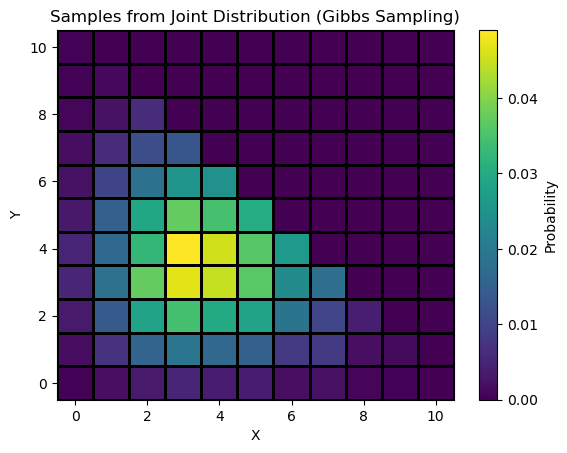

Chi-squared Statistic: 79.95148222267177, Critical value = 21.02606981748307, p-value: 0.1002889161945205


In [187]:
# Gibbs sampling
def gibbs_sampling(A1, A2, m, num_samples):
    samples = []
    current_sample = (np.random.randint(0, m+1), np.random.randint(0, m+1 - np.random.randint(0, m+1)))
    
    for _ in range(num_samples):
        i, j = current_sample
        
        # Sample i given j
        prob_i_given_j = np.array([normalized_joint_pmf(i, j, A1, A2, m) for i in range(m-j+1)])
        prob_i_given_j /= prob_i_given_j.sum()
        i = np.random.choice(np.arange(m-j+1), p=prob_i_given_j)
        
        # Sample j given i
        prob_j_given_i = np.array([normalized_joint_pmf(i, j, A1, A2, m) for j in range(m-i+1)])
        prob_j_given_i /= prob_j_given_i.sum()
        j = np.random.choice(np.arange(m-i+1), p=prob_j_given_i)
        
        current_sample = (i, j)
        samples.append(current_sample)
    
    return samples

# Generate samples
samples_gibbs = gibbs_sampling(A1, A2, m, num_samples)

# Plot histogram of samples
plt.hist2d(*zip(*samples_gibbs), bins=[np.arange(m+2)-0.5, np.arange(m+2)-0.5], density=True, edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Joint Distribution (Gibbs Sampling)')
plt.colorbar(label='Probability')
plt.show()

# Perform chi-square test
observed_freq, _, _ = np.histogram2d(*zip(*samples_gibbs), bins=[np.arange(m+2)-0.5, np.arange(m+2)-0.5])
observed_freq_flat = observed_freq.flatten()
observed_freq_nonzero = observed_freq_flat[expected_freq_flat > 0]
chi2_stat, p_value = chisquare(observed_freq_nonzero, f_exp=expected_freq_nonzero)
print(f"Chi-squared Statistic: {chi2_stat}, Critical value = {CV}, p-value: {p_value}")

## Exercsie 3

## (a)

a
[0.91533375 4.23008908]
b


Text(0.5, 1.0, 'Scatter Plot of Generated Samples')

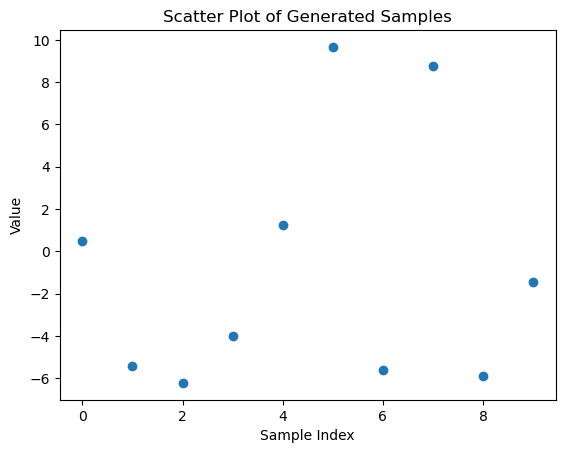

In [188]:
# Correlation coefficient
rho = 0.5
# Number of samples
n = 10

# Mean and covariance matrix for (ξ, γ)
mean = np.array([0, 0])
cov = np.array([[1, rho], [rho, 1]])

# Generate samples from the bivariate normal distribution
samples_xi_gamma = np.random.multivariate_normal(mean, cov)
xi = samples_xi_gamma[0]
gamma = samples_xi_gamma[1]
# Transform (ξ, γ) to (θ, ψ)
#samples_theta_psi = np.exp(samples_xi_gamma)
theta = np.exp(xi)
psi = np.exp(rho * xi + np.sqrt(1 - rho**2) * gamma)
samples_theta_psi = np.array([theta, psi])
print('a')
print(samples_theta_psi)
print('b')
X = np.random.normal(samples_theta_psi[0],samples_theta_psi[1],n)
plt.scatter(range(n),X)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Generated Samples')



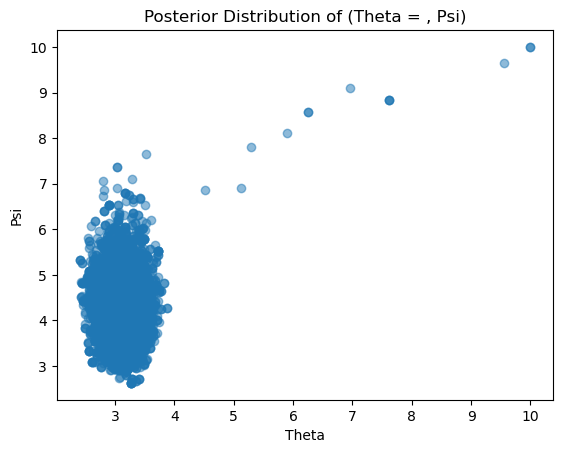

In [189]:
observations = np.random.normal(loc=3, scale=2, size=100)

def log_likelihood(theta, psi, observations):
    return np.sum(norm.logpdf(observations, loc=theta, scale=np.sqrt(psi)))

def log_prior(theta, psi):
    xi, gamma = np.log(theta), np.log(psi)
    return -0.5 * (xi**2 + gamma**2 - 2 * rho * xi * gamma) / (1 - rho**2)

def log_posterior(theta, psi, observations):
    return log_likelihood(theta, psi, observations) + log_prior(theta, psi)

# Metropolis-Hastings algorithm
def metropolis_hastings(observations, num_samples, initial_values, proposal_width):
    samples = []
    current_theta, current_psi = initial_values
    current_log_posterior = log_posterior(current_theta, current_psi, observations)
    
    for _ in range(num_samples):
        # Propose new values
        proposed_theta = np.exp(np.log(current_theta) + np.random.normal(0, proposal_width))
        proposed_psi = np.exp(np.log(current_psi) + np.random.normal(0, proposal_width))
        
        # Calculate log posterior for proposed values
        proposed_log_posterior = log_posterior(proposed_theta, proposed_psi, observations)
        
        # Acceptance probability
        acceptance_prob = np.exp(proposed_log_posterior - current_log_posterior)
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            current_theta, current_psi = proposed_theta, proposed_psi
            current_log_posterior = proposed_log_posterior
        
        samples.append([current_theta, current_psi])
    
    return np.array(samples)

# Initial values and proposal width
initial_values = [10, 10]
proposal_width = 0.1

# Generate samples from the posterior distribution
posterior_samples = metropolis_hastings(observations, num_samples, initial_values, proposal_width)

# Plot the samples to verify
plt.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.5)
plt.xlabel('Theta')
plt.ylabel('Psi')
plt.title('Posterior Distribution of (Theta = , Psi)')
plt.show()

## (b)

Generated (Theta, Psi) sample: (θ = 2.704655273685903, ψ = 4.135163794673054)
Generated observations X_i: [ 1.63822674  0.04637726 -2.33606568  0.18741082  4.04538526  2.24869994
  3.35149866  1.7925995  -0.49156099  1.80952548]


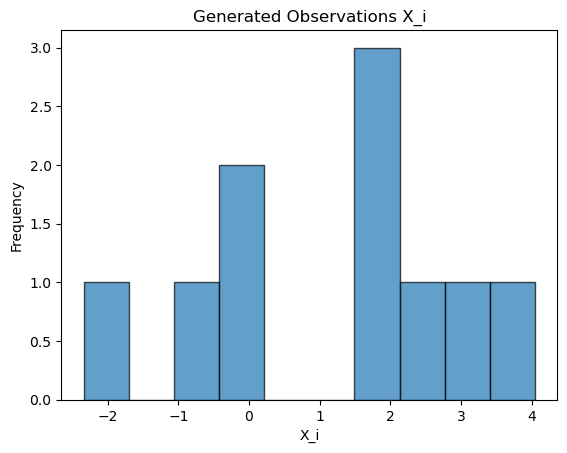

In [190]:
# Parameters for the Metropolis-Hastings algorithm
rho = 0.5
num_posterior_samples = 10000
n = 10  # Number of observations to generate

# Example observations to use in the posterior
observations = np.random.normal(loc=3, scale=2, size=100)

# Log-likelihood function
def log_likelihood(theta, psi, observations):
    return np.sum(norm.logpdf(observations, loc=theta, scale=np.sqrt(psi)))

# Log-prior function
def log_prior(theta, psi):
    xi, gamma = np.log(theta), np.log(psi)
    return -0.5 * (xi**2 + gamma**2 - 2 * rho * xi * gamma) / (1 - rho**2)

# Log-posterior function
def log_posterior(theta, psi, observations):
    return log_likelihood(theta, psi, observations) + log_prior(theta, psi)

# Metropolis-Hastings algorithm
def metropolis_hastings(observations, num_samples, initial_values, proposal_width):
    samples = []
    current_theta, current_psi = initial_values
    current_log_posterior = log_posterior(current_theta, current_psi, observations)
    
    for _ in range(num_samples):
        # Propose new values
        proposed_theta = np.exp(np.log(current_theta) + np.random.normal(0, proposal_width))
        proposed_psi = np.exp(np.log(current_psi) + np.random.normal(0, proposal_width))
        
        # Calculate log posterior for proposed values
        proposed_log_posterior = log_posterior(proposed_theta, proposed_psi, observations)
        
        # Acceptance probability
        acceptance_prob = np.exp(proposed_log_posterior - current_log_posterior)
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            current_theta, current_psi = proposed_theta, proposed_psi
            current_log_posterior = proposed_log_posterior
        
        samples.append([current_theta, current_psi])
    
    return np.array(samples)

# Initial values and proposal width for Metropolis-Hastings
initial_values = samples_theta_psi
proposal_width = 0.1

# Generate samples from the posterior distribution
posterior_samples = metropolis_hastings(observations, num_posterior_samples, initial_values, proposal_width)

# Use the last sample from the posterior distribution to generate new observations
theta_sample, psi_sample = posterior_samples[-1]
new_observations = np.random.normal(loc=theta_sample, scale=np.sqrt(psi_sample), size=n)

print(f"Generated (Theta, Psi) sample: (θ = {theta_sample}, ψ = {psi_sample})")
print(f"Generated observations X_i: {new_observations}")

# Plot the histogram of new observations
plt.hist(new_observations, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('X_i')
plt.ylabel('Frequency')
plt.title('Generated Observations X_i')
plt.show()

## (d)

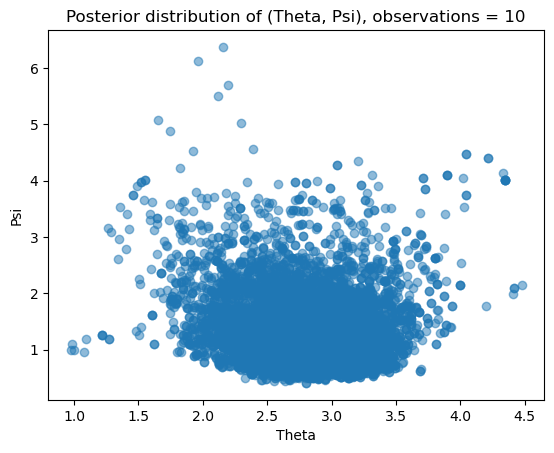

In [191]:
# Observations
n = 10
true_theta = 3.0
true_psi = 2.0
observations = np.random.normal(loc=true_theta, scale=np.sqrt(true_psi), size=n)

# Sample statistics
sample_mean = np.mean(observations)
sample_variance = np.var(observations, ddof=1)
# Log-posterior function
def log_posterior(theta, psi, sample_mean, sample_variance, n, rho):
    xi, gamma = np.log(theta), np.log(psi)
    log_likelihood = -0.5 * n * np.log(2 * np.pi * psi) - (n / 2 / psi) * sample_variance - (n / 2 / psi) * (sample_mean - theta)**2
    log_prior = -0.5 * (xi**2 - 2 * rho * xi * gamma + gamma**2) / (1 - rho**2) - np.log(2 * np.pi * theta * psi * np.sqrt(1 - rho**2))
    return log_likelihood + log_prior
# Metropolis-Hastings algorithm
def metropolis_hastings_posterior(sample_mean, sample_variance, n, num_samples, initial_values, proposal_width, rho):
    samples = []
    current_theta, current_psi = initial_values
    current_log_posterior = log_posterior(current_theta, current_psi, sample_mean, sample_variance, n, rho)
    
    for _ in range(num_samples):
        # Propose new values
        proposed_theta = np.exp(np.log(current_theta) + np.random.normal(0, proposal_width))
        proposed_psi = np.exp(np.log(current_psi) + np.random.normal(0, proposal_width))
        
        # Calculate log posterior for proposed values
        proposed_log_posterior = log_posterior(proposed_theta, proposed_psi, sample_mean, sample_variance, n, rho)
        
        # Acceptance probability
        acceptance_prob = np.exp(proposed_log_posterior - current_log_posterior)
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            current_theta, current_psi = proposed_theta, proposed_psi
            current_log_posterior = proposed_log_posterior
        
        samples.append([current_theta, current_psi])
    
    return np.array(samples)

# Initial values and proposal width for Metropolis-Hastings
initial_values = [1, 1]  # Initial values for (Theta, Psi)
proposal_width = 0.1  # Width of the proposal distribution
num_samples = 10000  # Number of MCMC samples
rho = 0.5  # Correlation coefficient

# Generate samples from the posterior distribution
posterior_samples = metropolis_hastings_posterior(sample_mean, sample_variance, n, num_samples, initial_values, proposal_width, rho)

# Plot the samples to visualize the posterior distribution
plt.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.5)
plt.xlabel('Theta')
plt.ylabel('Psi')
plt.title('Posterior distribution of (Theta, Psi), observations = 10')
plt.show()

## (e)

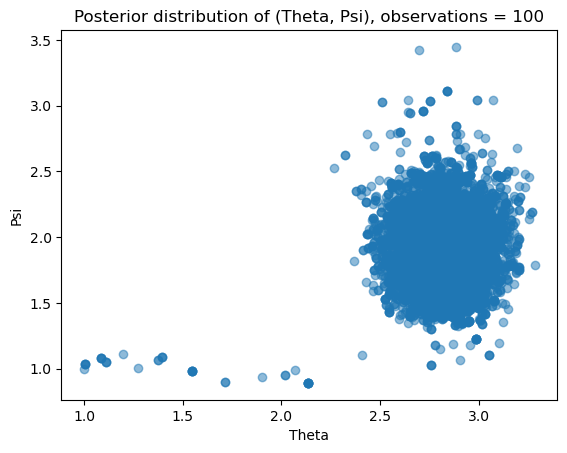

In [192]:
# Observations
n = 100
true_theta = 3.0
true_psi = 2.0
observations = np.random.normal(loc=true_theta, scale=np.sqrt(true_psi), size=n)

# Sample statistics
sample_mean = np.mean(observations)
sample_variance = np.var(observations, ddof=1)

# Initial values and proposal width for Metropolis-Hastings
initial_values = [1, 1]  # Initial values for (Theta, Psi)
proposal_width = 0.1  # Width of the proposal distribution
num_samples = 10000  # Number of MCMC samples
rho = 0.5  # Correlation coefficient

# Generate samples from the posterior distribution
posterior_samples = metropolis_hastings_posterior(sample_mean, sample_variance, n, num_samples, initial_values, proposal_width, rho)

# Plot the samples to visualize the posterior distribution
plt.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.5)
plt.xlabel('Theta')
plt.ylabel('Psi')
plt.title('Posterior distribution of (Theta, Psi), observations = 100')
plt.show()

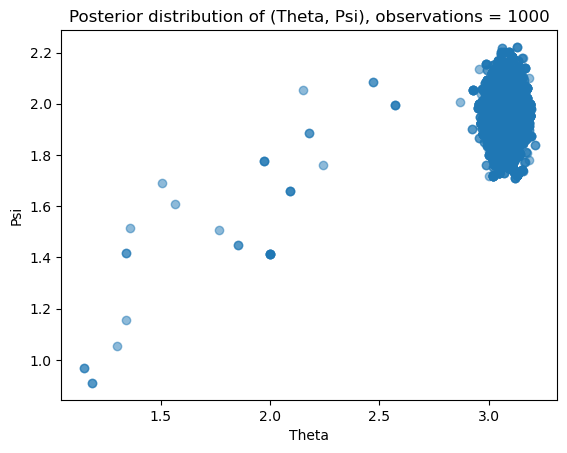

In [193]:
# Observations
n = 1000
true_theta = 3.0
true_psi = 2.0
observations = np.random.normal(loc=true_theta, scale=np.sqrt(true_psi), size=n)

# Sample statistics
sample_mean = np.mean(observations)
sample_variance = np.var(observations, ddof=1)

# Initial values and proposal width for Metropolis-Hastings
initial_values = [1, 1]  # Initial values for (Theta, Psi)
proposal_width = 0.1  # Width of the proposal distribution
num_samples = 10000  # Number of MCMC samples
rho = 0.5  # Correlation coefficient

# Generate samples from the posterior distribution
posterior_samples = metropolis_hastings_posterior(sample_mean, sample_variance, n, num_samples, initial_values, proposal_width, rho)

# Plot the samples to visualize the posterior distribution
plt.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.5)
plt.xlabel('Theta')
plt.ylabel('Psi')
plt.title('Posterior distribution of (Theta, Psi), observations = 1000')
plt.show()